In [15]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#load the data matrics
matrix_3st = np.loadtxt('right3st.txt')
print('3 state scenario matrics has the shape:',matrix_3st.shape)

3 state scenario matrics has the shape: (13394, 21)


In [17]:
a = matrix_3st[np.where(matrix_3st[:,0]==4),:]

In [18]:
a

array([[[4., 0., 1., ..., 0., 0., 1.],
        [4., 0., 1., ..., 0., 0., 1.],
        [4., 0., 1., ..., 0., 1., 0.],
        ...,
        [4., 6., 7., ..., 0., 5., 2.],
        [4., 6., 7., ..., 0., 4., 3.],
        [4., 6., 7., ..., 0., 5., 2.]]])

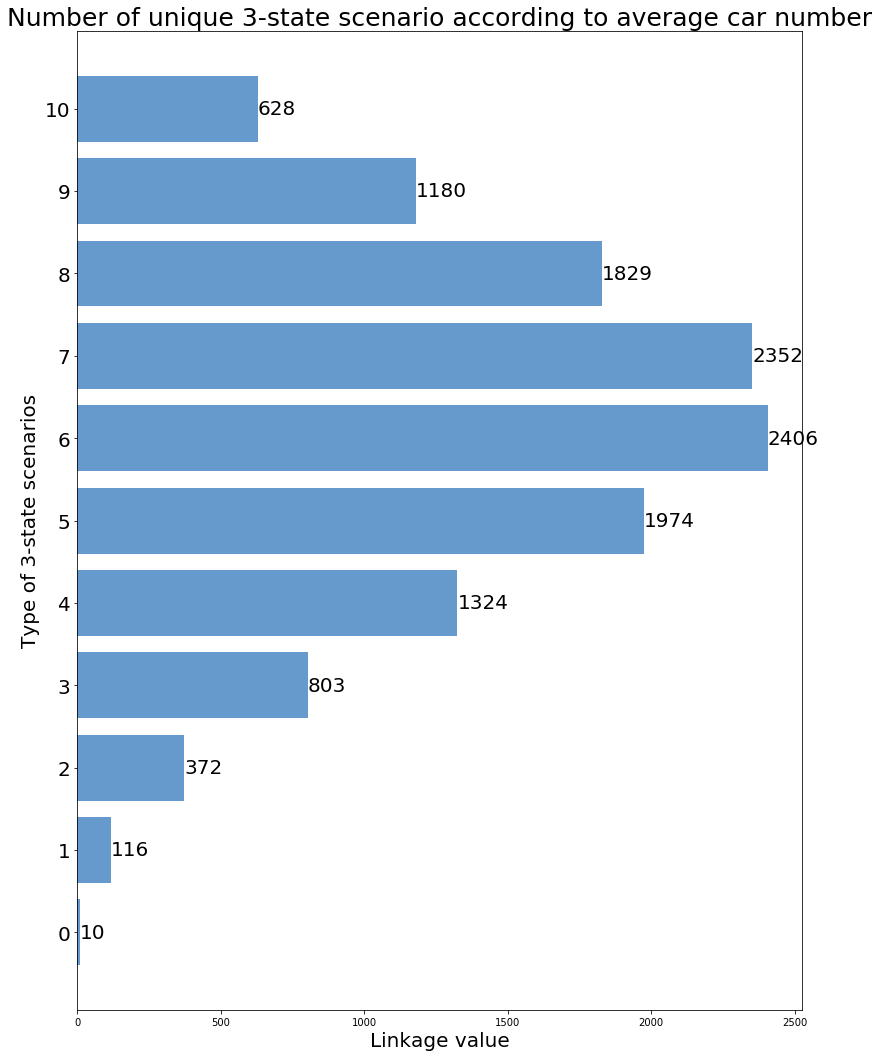

In [43]:
fig, ax = plt.subplots(figsize=(13,18))
value = []
for i in range(11):
    num = matrix_3st[np.where(matrix_3st[:,0]==i),:].shape[1]
    value.append(num)
f = ax.barh(range(11), value, color='#6699CC')
for rect in f:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' %
            int(w-1), ha='left', va='center', fontsize = 20)
ax.set_yticks(range(11))
ax.set_yticklabels(range(11),fontsize = 20)
ax.set_title("Number of unique 3-state scenario according to average car number",fontsize = 25)
plt.ylabel('Type of 3-state scenarios',fontsize = 20)
plt.xlabel('Linkage value',fontsize = 20)
plt.show()

In [5]:
car1 = matrix_3st[np.where(matrix_3st[:,0]==1),:]
car1 = car1[:,1:]
car1 = np.squeeze(car1,axis= (0,))
str1 = ";".join(str(i) for i in car1)
str1 = str1.split(";")
str1

['[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]',
 '[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]',
 '[1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]',
 '[1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]',
 '[1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]',
 '[1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]',
 '[1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0

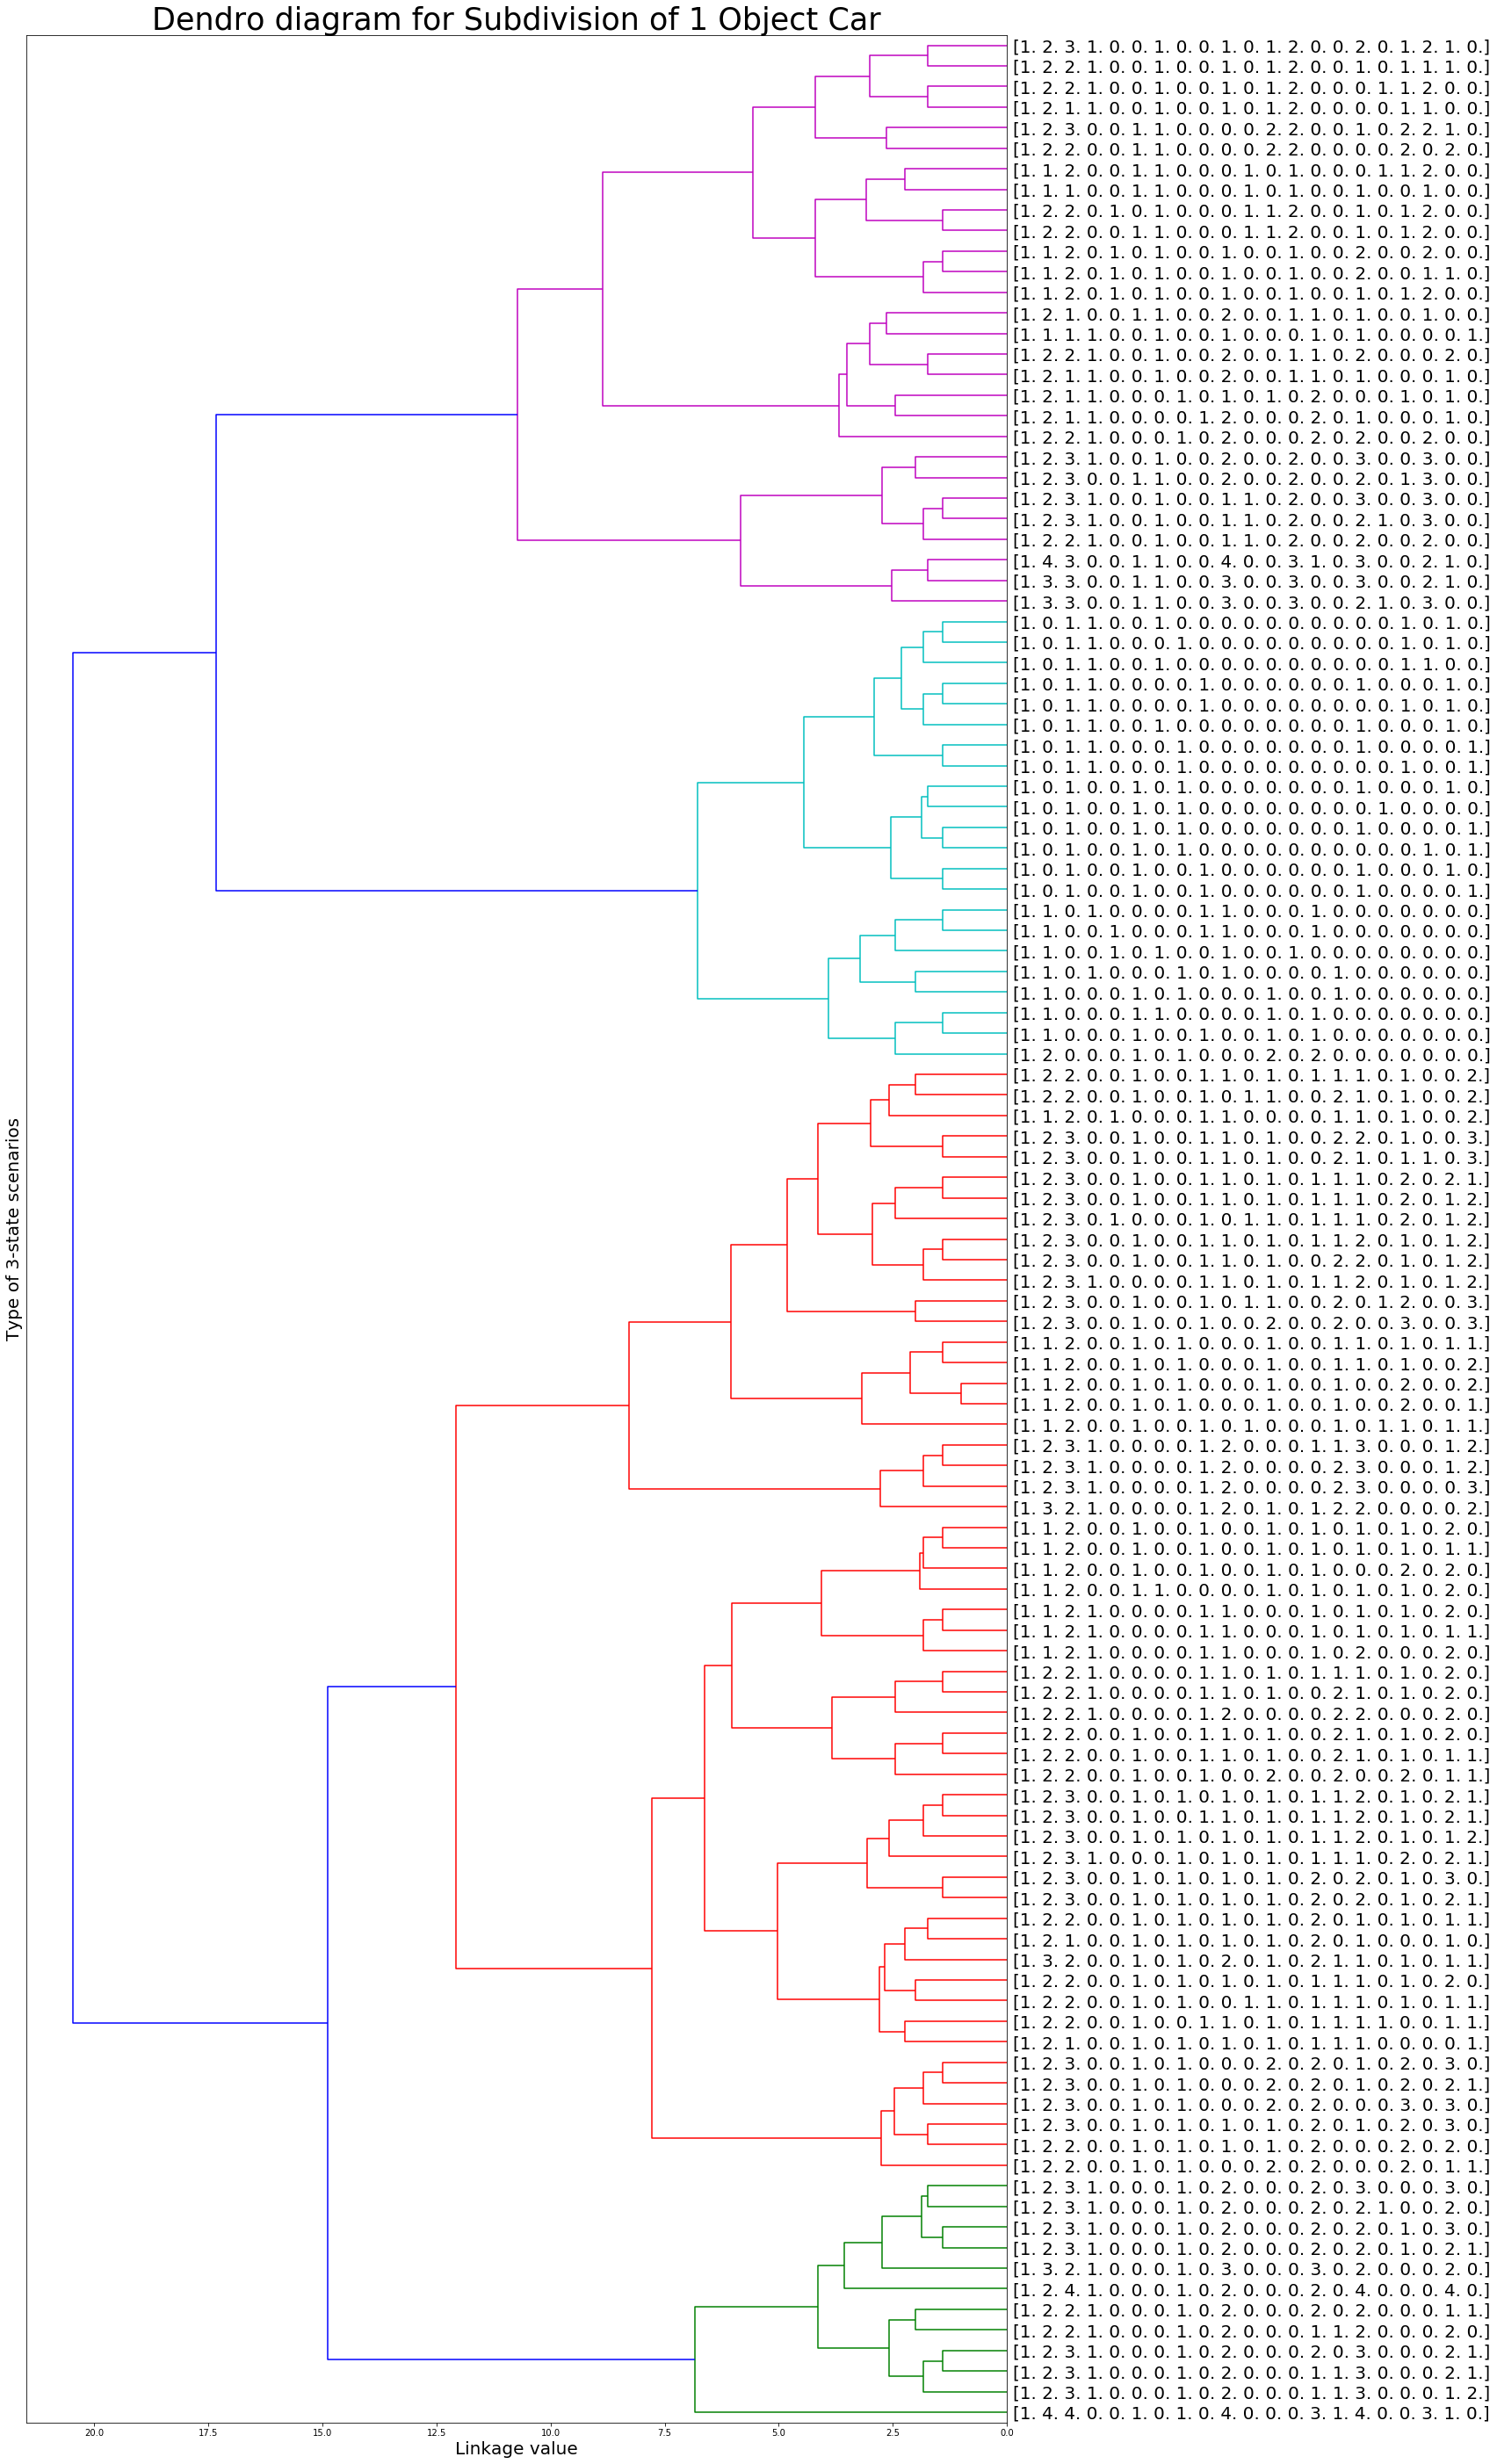

(115, 4)


In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car1, 'ward')
f = fcluster(Z,0.0001,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 1 Object Car',fontsize = 35)
plt.ylabel('Type of 3-state scenarios',fontsize = 20)
plt.xlabel('Linkage value',fontsize = 20)
dn = dendrogram(Z,labels=str1,orientation='left', leaf_rotation=0,
              leaf_font_size=20)
plt.show()

print(Z.shape)

In [21]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[ 27.          28.           1.           2.        ]
 [  0.           1.           1.41421356   2.        ]
 [  2.           4.           1.41421356   2.        ]
 [  6.           7.           1.41421356   2.        ]
 [  8.          10.           1.41421356   2.        ]
 [  9.          11.           1.41421356   2.        ]
 [ 14.          16.           1.41421356   2.        ]
 [ 17.          19.           1.41421356   2.        ]
 [ 37.          38.           1.41421356   2.        ]
 [ 77.          78.           1.41421356   2.        ]
 [ 76.          79.           1.41421356   2.        ]
 [ 50.          51.           1.41421356   2.        ]
 [ 29.          30.           1.41421356   2.        ]
 [ 24.          25.           1.41421356   2.        ]
 [ 80.          85.           1.41421356   2.        ]
 [ 74.          75.           1.41421356   2.        ]
 [ 62.          63.           1.41421356   2.        ]
 [ 87.          88.           1.41421356   2.        ]
 [ 82.    

24

In [24]:
car2 = matrix_3st[np.where(matrix_3st[:,0]==2),:]
car2 = car2[:,1:]
car2 = np.squeeze(car2,axis= (0,))
str2 = ";".join(str(i) for i in car2)
str2 = str2.split(";")
str2

['[2. 0. 1. 0. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]',
 '[2. 0. 1. 1. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]',
 '[2. 0. 3. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 2. 0.]',
 '[2. 1. 0. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 0. 0. 2. 0. 2. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 1. 0. 1. 0. 2. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 1. 0. 1. 0. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 2. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 2. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 2. 0. 0. 0. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 0. 2. 0. 0. 2. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[2. 1. 1. 0. 0. 2. 0. 1. 1. 0. 0

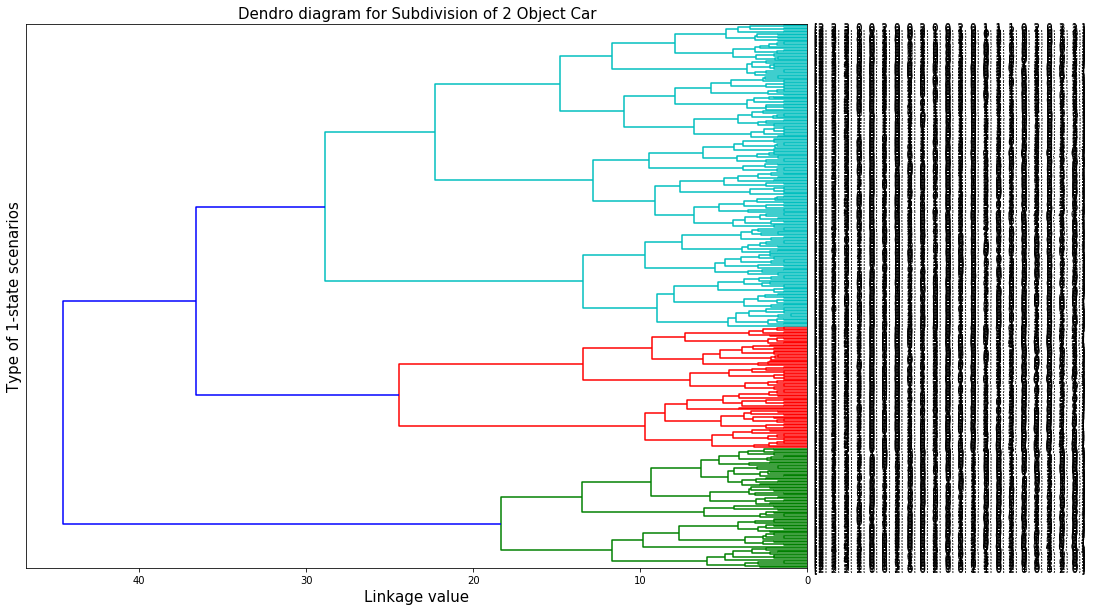

(371, 4)


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car2, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendro diagram for Subdivision of 2 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str2, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [27]:
np.set_printoptions(threshold=10000)
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[ 46.          47.           1.           2.        ]
 [ 14.          15.           1.41421356   2.        ]
 [ 17.          19.           1.41421356   2.        ]
 [  4.           6.           1.41421356   2.        ]
 [ 28.          29.           1.41421356   2.        ]
 [ 43.          44.           1.41421356   2.        ]
 [ 50.          51.           1.41421356   2.        ]
 [ 21.          23.           1.41421356   2.        ]
 [ 30.          32.           1.41421356   2.        ]
 [ 42.          49.           1.41421356   2.        ]
 [ 11.          12.           1.41421356   2.        ]
 [ 33.          34.           1.41421356   2.        ]
 [  8.           9.           1.41421356   2.        ]
 [ 52.          53.           1.41421356   2.        ]
 [141.         142.           1.41421356   2.        ]
 [ 73.          74.           1.41421356   2.        ]
 [129.         130.           1.41421356   2.        ]
 [128.         131.           1.41421356   2.        ]
 [ 98.    

80

In [28]:
car3 = matrix_3st[np.where(matrix_3st[:,0]==3),:]
car3 = car3[:,1:]
car3 = np.squeeze(car3,axis= (0,))
str3 = ";".join(str(i) for i in car3)
str3 = str3.split(";")
str3

['[3. 0. 1. 1. 0. 2. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[3. 1. 1. 3. 0. 0. 0. 2. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]',
 '[3. 1. 2. 0. 0. 3. 3. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 2. 0. 0.]',
 '[3. 1. 2. 2. 0. 1. 0. 2. 1. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0.]',
 '[3. 1. 2. 2. 0. 1. 0. 2. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 2. 0.]',
 '[3. 1. 2. 2. 0. 1. 0. 3. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 2. 0.]',
 '[3. 1. 2. 2. 0. 1. 1. 2. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]',
 '[3. 1. 2. 2. 0. 1. 2. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 2. 0. 0.]',
 '[3. 1. 2. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2.]',
 '[3. 2. 0. 0. 0. 3. 0. 2. 1. 0. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0.]',
 '[3. 2. 0. 0. 0. 3. 0. 3. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0.]',
 '[3. 2. 0. 1. 0. 2. 0. 3. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0.]',
 '[3. 2. 0. 3. 0. 0. 1. 2. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]',
 '[3. 2. 1. 0. 0. 3. 0. 0. 3. 0. 0. 2. 0. 0. 2. 0. 0. 1. 0. 0. 1.]',
 '[3. 2. 1. 0. 0. 3. 0. 1. 2. 0. 0

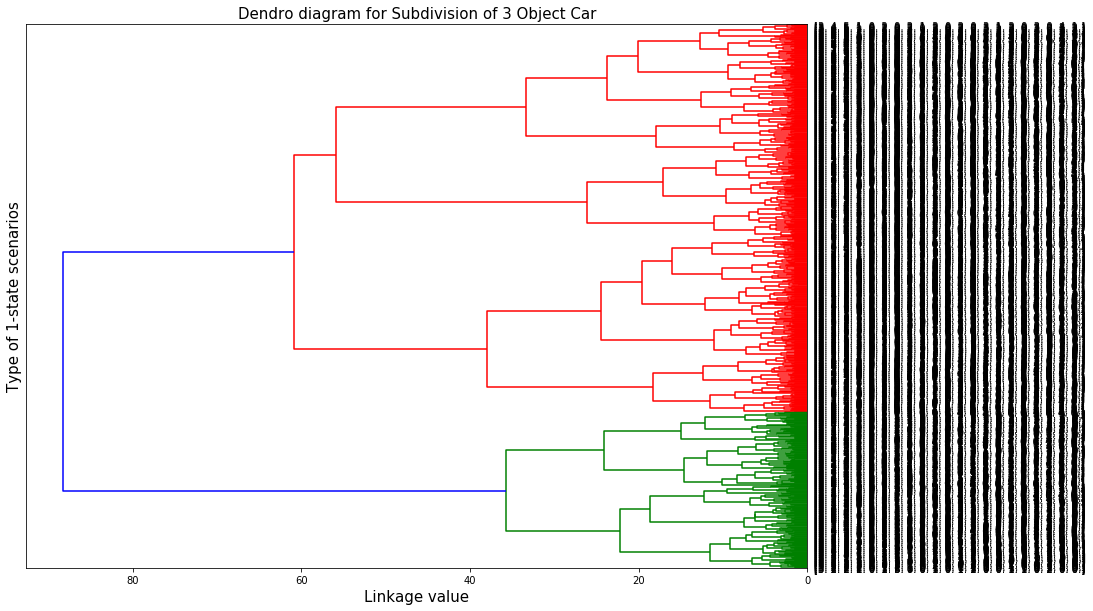

(802, 4)


In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car3, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendro diagram for Subdivision of 3 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str3, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [30]:
np.set_printoptions(threshold=10000)
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[1.42000000e+02 1.43000000e+02 1.00000000e+00 2.00000000e+00]
 [4.00000000e+00 5.00000000e+00 1.41421356e+00 2.00000000e+00]
 [7.90000000e+01 8.00000000e+01 1.41421356e+00 2.00000000e+00]
 [7.70000000e+01 8.20000000e+01 1.41421356e+00 2.00000000e+00]
 [2.40000000e+01 2.60000000e+01 1.41421356e+00 2.00000000e+00]
 [1.80000000e+01 1.90000000e+01 1.41421356e+00 2.00000000e+00]
 [2.20000000e+01 2.70000000e+01 1.41421356e+00 2.00000000e+00]
 [3.00000000e+01 3.20000000e+01 1.41421356e+00 2.00000000e+00]
 [3.40000000e+01 3.50000000e+01 1.41421356e+00 2.00000000e+00]
 [7.60000000e+01 8.10000000e+01 1.41421356e+00 2.00000000e+00]
 [1.63000000e+02 1.67000000e+02 1.41421356e+00 2.00000000e+00]
 [3.80000000e+01 3.90000000e+01 1.41421356e+00 2.00000000e+00]
 [6.60000000e+01 6.80000000e+01 1.41421356e+00 2.00000000e+00]
 [1.58000000e+02 1.62000000e+02 1.41421356e+00 2.00000000e+00]
 [4.70000000e+01 4.80000000e+01 1.41421356e+00 2.00000000e+00]
 [4.50000000e+01 4.60000000e+01 1.41421356e+00 2.000000

178

In [31]:
car4 = matrix_3st[np.where(matrix_3st[:,0]==4),:]
car4 = car4[:,1:]
car4 = np.squeeze(car4,axis= (0,))
str4 = ";".join(str(i) for i in car4)
str4 = str4.split(";")
str4

['[4. 0. 1. 3. 0. 1. 0. 3. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]',
 '[4. 0. 1. 4. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[4. 1. 0. 3. 0. 1. 0. 3. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[4. 1. 2. 2. 0. 2. 0. 3. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 2. 0.]',
 '[4. 1. 2. 3. 0. 1. 0. 3. 1. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0.]',
 '[4. 2. 1. 3. 0. 1. 0. 3. 1. 0. 0. 2. 0. 2. 0. 0. 0. 1. 0. 1. 0.]',
 '[4. 2. 3. 0. 0. 4. 0. 1. 3. 0. 0. 2. 0. 1. 1. 0. 0. 3. 0. 1. 2.]',
 '[4. 2. 3. 2. 0. 2. 0. 3. 1. 0. 0. 2. 0. 2. 0. 1. 0. 2. 0. 2. 1.]',
 '[4. 2. 3. 3. 0. 1. 0. 0. 4. 2. 0. 0. 0. 0. 2. 2. 1. 0. 0. 0. 3.]',
 '[4. 2. 3. 3. 0. 1. 0. 2. 2. 1. 0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 2.]',
 '[4. 2. 3. 3. 0. 1. 3. 1. 0. 1. 0. 1. 2. 0. 0. 2. 0. 1. 3. 0. 0.]',
 '[4. 2. 3. 4. 0. 0. 0. 3. 1. 2. 0. 0. 0. 1. 1. 3. 0. 0. 0. 2. 1.]',
 '[4. 3. 0. 1. 0. 3. 0. 4. 0. 0. 0. 3. 0. 3. 0. 0. 0. 0. 0. 0. 0.]',
 '[4. 3. 0. 3. 0. 1. 0. 4. 0. 1. 0. 2. 0. 3. 0. 0. 0. 0. 0. 0. 0.]',
 '[4. 3. 1. 0. 0. 4. 4. 0. 0. 0. 0

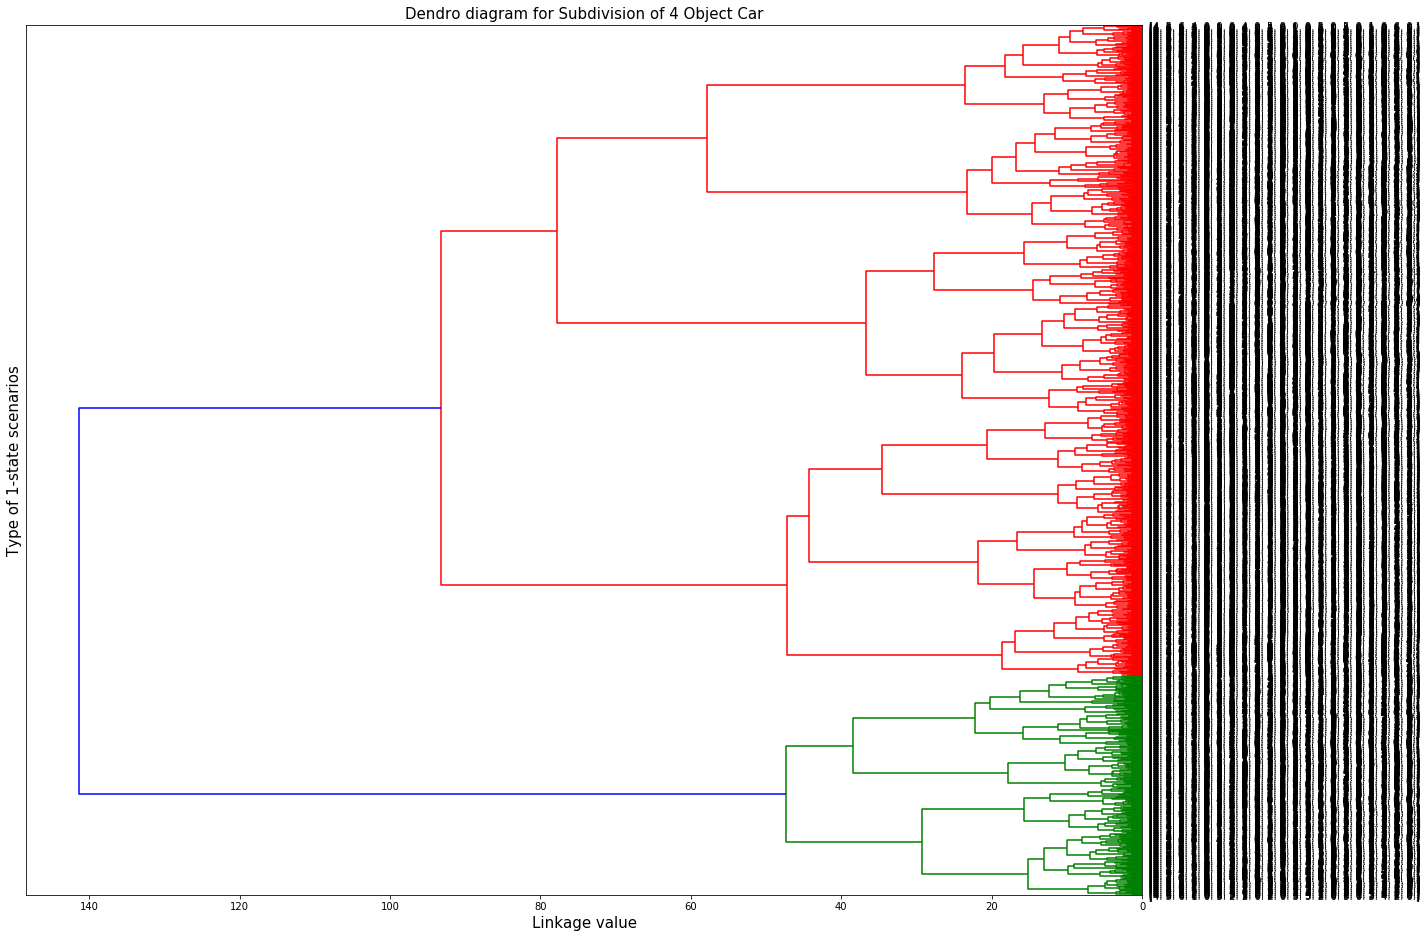

(1323, 4)


In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car4, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 16))
plt.title('Dendro diagram for Subdivision of 4 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str4, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [33]:
np.set_printoptions(threshold=10000)
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[1.70000000e+01 1.80000000e+01 1.41421356e+00 2.00000000e+00]
 [3.10000000e+01 3.20000000e+01 1.41421356e+00 2.00000000e+00]
 [4.10000000e+01 4.20000000e+01 1.41421356e+00 2.00000000e+00]
 [4.70000000e+01 4.80000000e+01 1.41421356e+00 2.00000000e+00]
 [1.36000000e+02 1.37000000e+02 1.41421356e+00 2.00000000e+00]
 [1.44000000e+02 1.45000000e+02 1.41421356e+00 2.00000000e+00]
 [2.80000000e+01 3.00000000e+01 1.41421356e+00 2.00000000e+00]
 [1.19000000e+02 1.42000000e+02 1.41421356e+00 2.00000000e+00]
 [6.20000000e+01 6.40000000e+01 1.41421356e+00 2.00000000e+00]
 [1.33000000e+02 1.66000000e+02 1.41421356e+00 2.00000000e+00]
 [5.90000000e+01 6.10000000e+01 1.41421356e+00 2.00000000e+00]
 [4.50000000e+01 6.60000000e+01 1.41421356e+00 2.00000000e+00]
 [6.80000000e+01 6.90000000e+01 1.41421356e+00 2.00000000e+00]
 [1.40000000e+02 1.72000000e+02 1.41421356e+00 2.00000000e+00]
 [2.58000000e+02 2.90000000e+02 1.41421356e+00 2.00000000e+00]
 [4.31000000e+02 4.33000000e+02 1.41421356e+00 2.000000

305

In [34]:
car5 = matrix_3st[np.where(matrix_3st[:,0]==5),:]
car5 = car5[:,1:]
car5 = np.squeeze(car5,axis= (0,))
str5 = ";".join(str(i) for i in car5)
str5 = str5.split(";")
str5

['[5. 1. 4. 3. 0. 2. 0. 4. 1. 0. 0. 1. 0. 1. 0. 3. 0. 1. 0. 1. 3.]',
 '[5. 2. 3. 0. 0. 5. 0. 5. 0. 2. 0. 0. 0. 2. 0. 2. 0. 1. 0. 3. 0.]',
 '[5. 2. 3. 3. 0. 2. 0. 3. 2. 0. 0. 2. 0. 2. 0. 1. 0. 2. 0. 3. 0.]',
 '[5. 3. 0. 3. 0. 2. 0. 4. 1. 1. 0. 2. 0. 3. 0. 0. 0. 0. 0. 0. 0.]',
 '[5. 3. 0. 4. 0. 1. 0. 5. 0. 1. 0. 2. 0. 3. 0. 0. 0. 0. 0. 0. 0.]',
 '[5. 3. 2. 2. 0. 3. 0. 4. 1. 0. 0. 3. 0. 3. 0. 0. 0. 2. 0. 2. 0.]',
 '[5. 3. 2. 3. 0. 2. 0. 3. 2. 1. 0. 2. 0. 2. 1. 0. 0. 2. 0. 2. 0.]',
 '[5. 3. 3. 3. 0. 2. 0. 4. 1. 1. 0. 2. 0. 3. 0. 0. 0. 3. 0. 3. 0.]',
 '[5. 3. 4. 0. 0. 5. 0. 2. 3. 0. 0. 3. 0. 1. 2. 0. 0. 4. 0. 1. 3.]',
 '[5. 3. 4. 0. 0. 5. 0. 3. 2. 3. 0. 0. 0. 2. 1. 3. 0. 1. 0. 2. 2.]',
 '[5. 3. 4. 0. 0. 5. 0. 5. 0. 3. 0. 0. 0. 3. 0. 4. 0. 0. 0. 4. 0.]',
 '[5. 3. 4. 0. 1. 4. 0. 2. 3. 0. 0. 3. 0. 1. 2. 0. 1. 3. 0. 1. 3.]',
 '[5. 3. 4. 0. 1. 4. 0. 4. 1. 0. 0. 3. 0. 3. 0. 0. 1. 3. 0. 3. 1.]',
 '[5. 3. 4. 1. 0. 4. 0. 1. 4. 0. 0. 3. 0. 1. 2. 0. 0. 4. 0. 1. 3.]',
 '[5. 3. 4. 1. 0. 4. 0. 4. 1. 0. 0

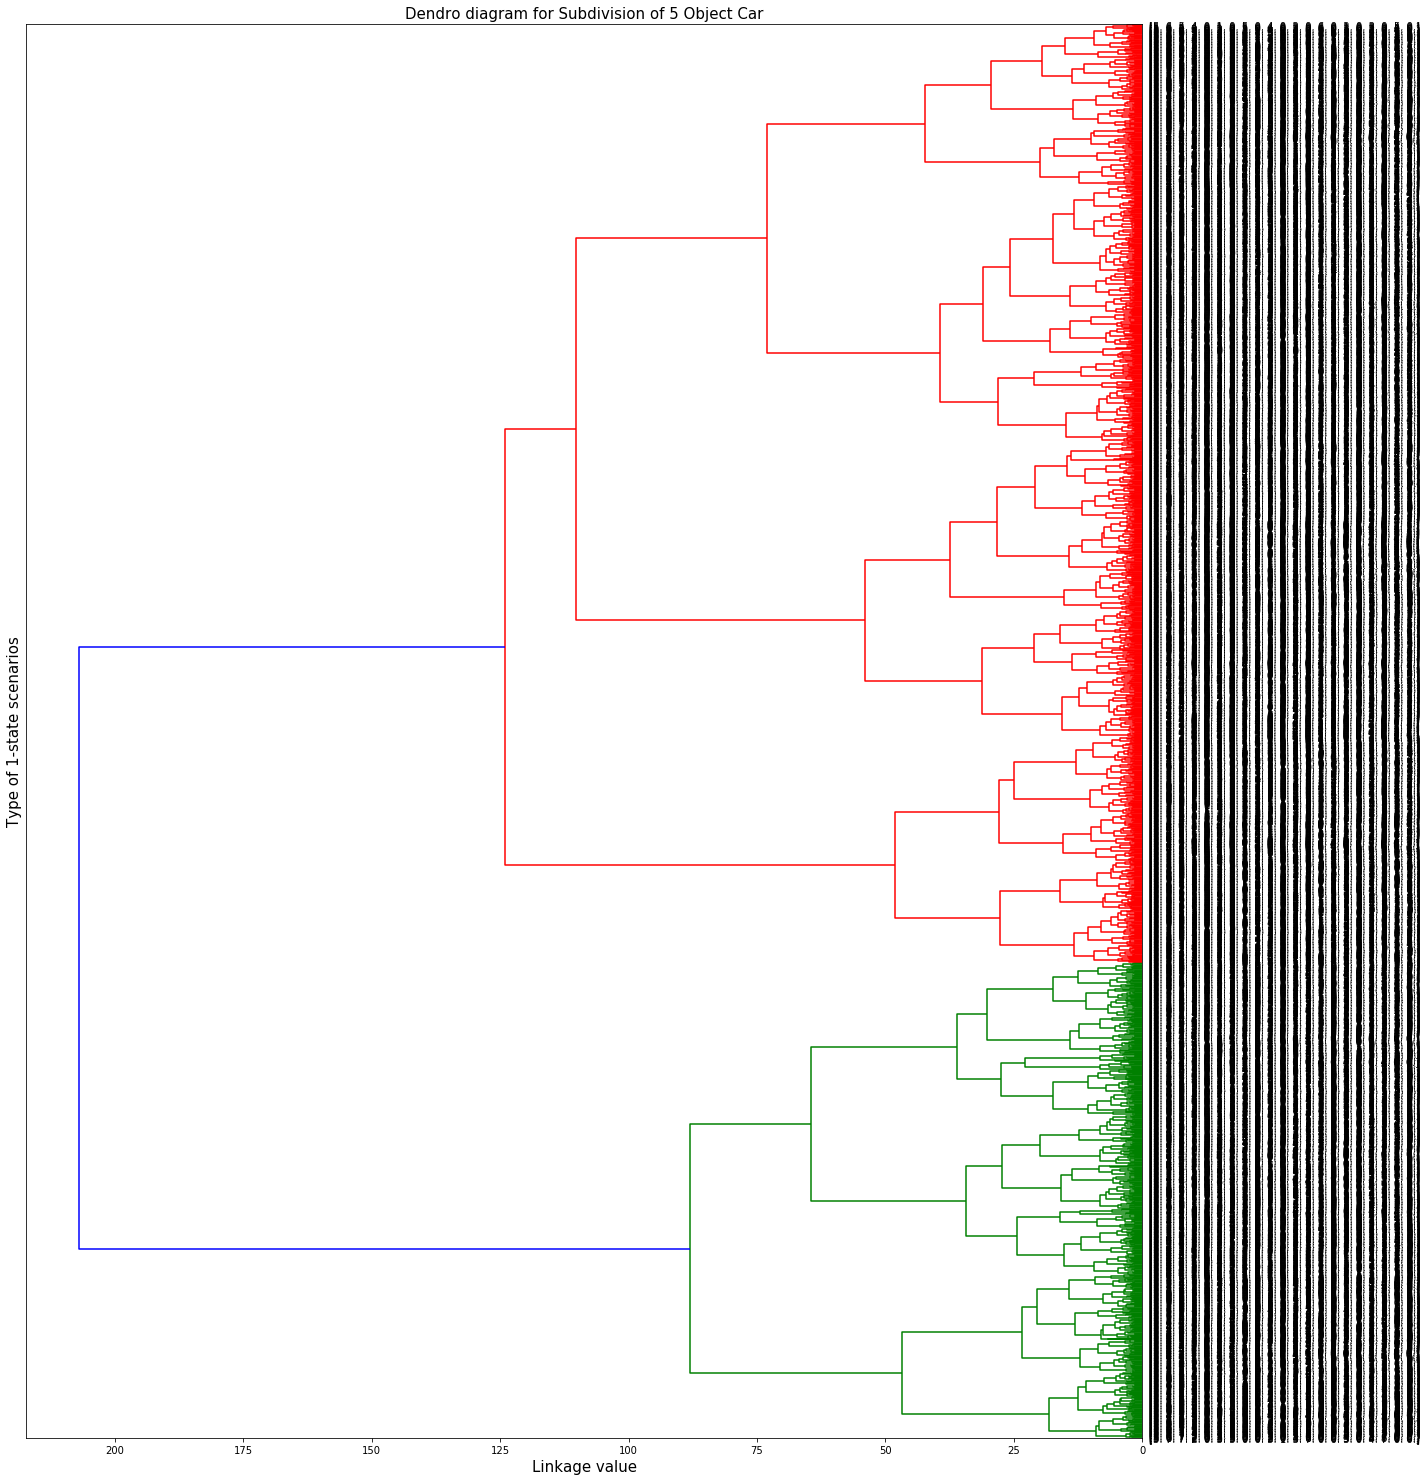

(1973, 4)


In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car5, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 26))
plt.title('Dendro diagram for Subdivision of 5 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str5, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [36]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[1.27100000e+03 1.27200000e+03 1.00000000e+00 2.00000000e+00]
 [1.93600000e+03 1.93700000e+03 1.00000000e+00 2.00000000e+00]
 [2.42000000e+02 2.43000000e+02 1.41421356e+00 2.00000000e+00]
 [2.37000000e+02 2.77000000e+02 1.41421356e+00 2.00000000e+00]
 [1.17000000e+02 1.19000000e+02 1.41421356e+00 2.00000000e+00]
 [1.20000000e+02 1.22000000e+02 1.41421356e+00 2.00000000e+00]
 [3.76000000e+02 3.77000000e+02 1.41421356e+00 2.00000000e+00]
 [4.41000000e+02 4.42000000e+02 1.41421356e+00 2.00000000e+00]
 [1.09000000e+02 1.13000000e+02 1.41421356e+00 2.00000000e+00]
 [8.60000000e+01 1.14000000e+02 1.41421356e+00 2.00000000e+00]
 [1.05000000e+02 1.98300000e+03 1.41421356e+00 3.00000000e+00]
 [4.35000000e+02 4.40000000e+02 1.41421356e+00 2.00000000e+00]
 [6.18000000e+02 6.83000000e+02 1.41421356e+00 2.00000000e+00]
 [2.38000000e+02 2.39000000e+02 1.41421356e+00 2.00000000e+00]
 [2.74000000e+02 2.75000000e+02 1.41421356e+00 2.00000000e+00]
 [4.48000000e+02 4.49000000e+02 1.41421356e+00 2.000000

477

In [37]:
car6 = matrix_3st[np.where(matrix_3st[:,0]==6),:]
car6 = car6[:,1:]
car6 = np.squeeze(car6,axis= (0,))
str6 = ";".join(str(i) for i in car6)
str6 = str6.split(";")
str6

['[6. 2. 3. 4. 0. 2. 0. 3. 3. 1. 0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 2.]',
 '[6. 2. 4. 3. 0. 3. 0. 6. 0. 1. 0. 1. 0. 1. 1. 3. 0. 1. 0. 3. 1.]',
 '[6. 3. 2. 3. 0. 3. 0. 5. 1. 0. 0. 3. 0. 3. 0. 0. 0. 2. 0. 2. 0.]',
 '[6. 3. 2. 3. 0. 3. 0. 6. 0. 1. 0. 2. 0. 2. 1. 1. 0. 1. 0. 1. 1.]',
 '[6. 4. 2. 3. 0. 3. 0. 6. 0. 0. 0. 4. 0. 4. 0. 1. 0. 1. 0. 1. 1.]',
 '[6. 4. 3. 3. 0. 3. 0. 5. 1. 1. 0. 3. 0. 3. 1. 0. 0. 3. 0. 3. 0.]',
 '[6. 4. 3. 3. 0. 3. 0. 6. 0. 0. 0. 4. 0. 4. 0. 0. 0. 3. 0. 3. 0.]',
 '[6. 4. 3. 4. 0. 2. 0. 4. 2. 2. 0. 2. 0. 4. 0. 1. 0. 2. 0. 2. 1.]',
 '[6. 4. 3. 4. 0. 2. 0. 6. 0. 1. 0. 3. 0. 3. 1. 1. 0. 2. 0. 2. 1.]',
 '[6. 4. 4. 3. 0. 3. 0. 5. 1. 3. 0. 1. 0. 2. 2. 1. 0. 3. 0. 3. 1.]',
 '[6. 4. 4. 3. 0. 3. 0. 5. 1. 3. 0. 1. 0. 2. 2. 3. 0. 1. 0. 4. 0.]',
 '[6. 4. 4. 4. 0. 2. 0. 6. 0. 1. 0. 3. 0. 4. 0. 1. 0. 3. 0. 3. 1.]',
 '[6. 4. 5. 0. 0. 6. 0. 5. 1. 0. 0. 4. 0. 4. 0. 0. 1. 4. 0. 4. 1.]',
 '[6. 4. 5. 0. 0. 6. 3. 3. 0. 4. 0. 0. 3. 1. 0. 4. 0. 1. 4. 1. 0.]',
 '[6. 4. 5. 1. 0. 5. 0. 3. 3. 0. 0

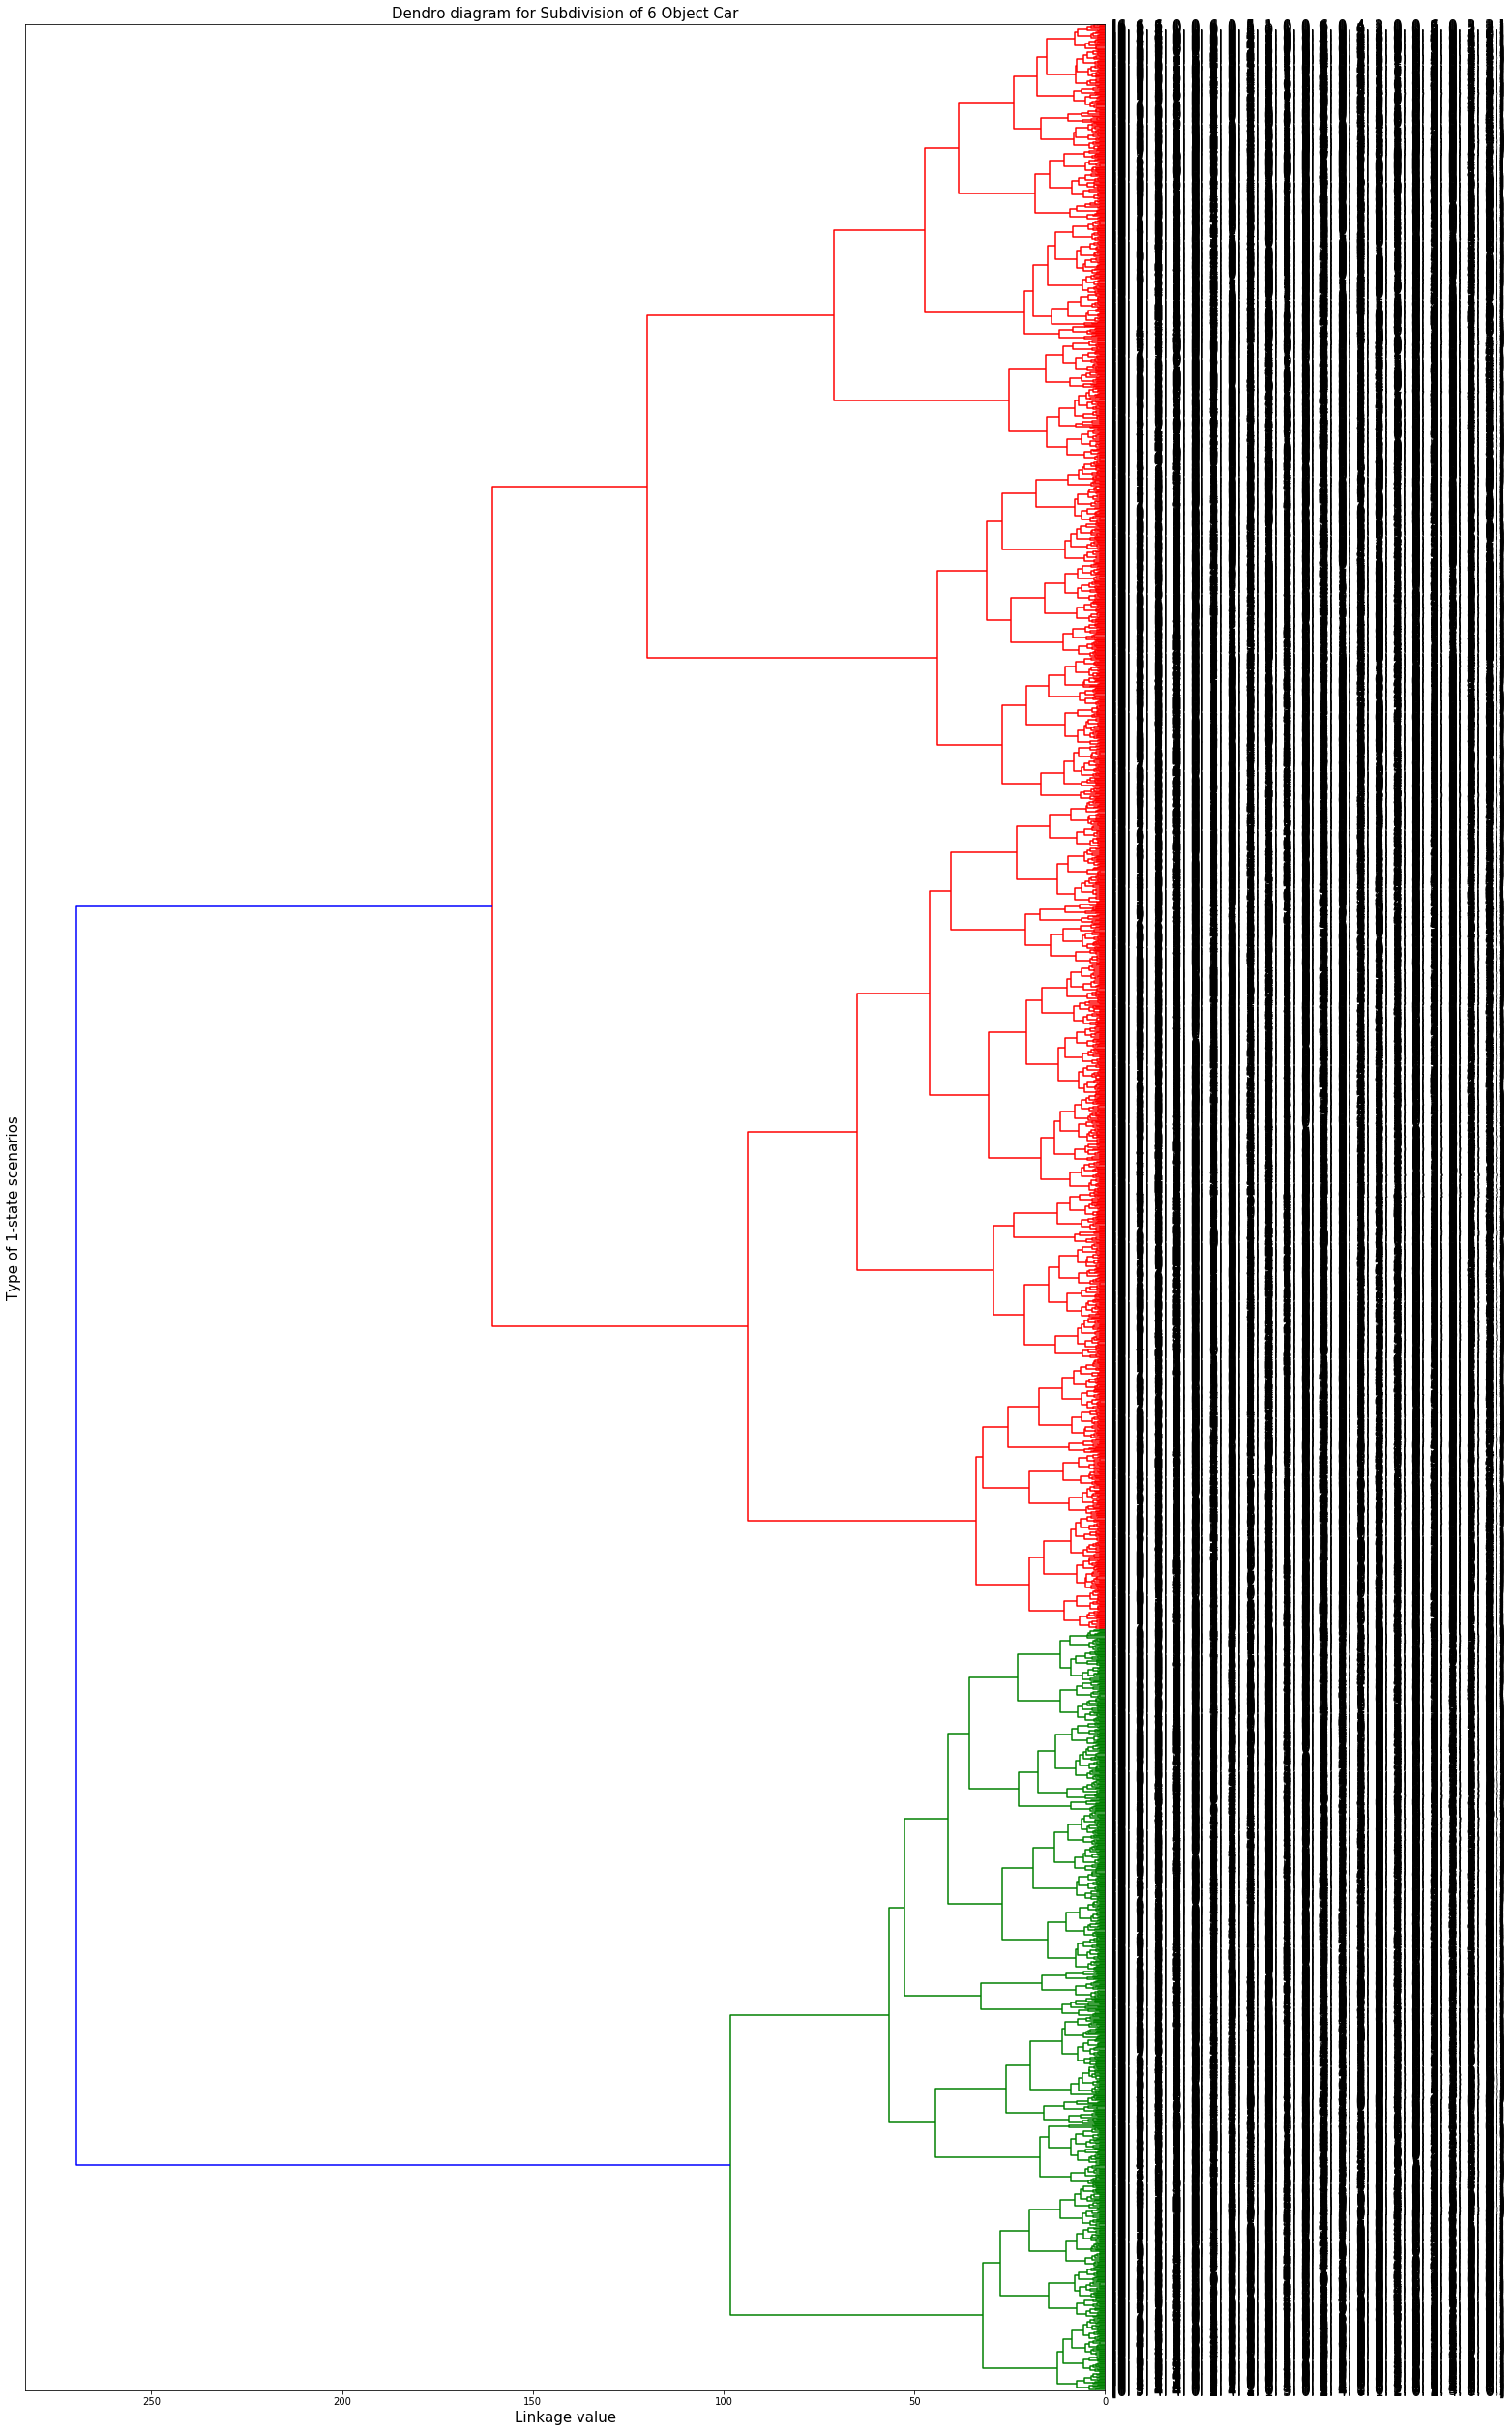

(2405, 4)


In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car6, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 45))
plt.title('Dendro diagram for Subdivision of 6 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str6,orientation='left', leaf_rotation=0,
              leaf_font_size=15)

plt.show()
print(Z.shape)

In [39]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[3.35000000e+02 4.05000000e+02 1.41421356e+00 2.00000000e+00]
 [1.70000000e+02 1.71000000e+02 1.41421356e+00 2.00000000e+00]
 [1.66000000e+02 1.72000000e+02 1.41421356e+00 2.00000000e+00]
 [9.70000000e+01 1.38000000e+02 1.41421356e+00 2.00000000e+00]
 [1.32000000e+02 1.34000000e+02 1.41421356e+00 2.00000000e+00]
 [2.67000000e+02 3.36000000e+02 1.41421356e+00 2.00000000e+00]
 [9.20000000e+01 1.33000000e+02 1.41421356e+00 2.00000000e+00]
 [1.05100000e+03 1.05200000e+03 1.41421356e+00 2.00000000e+00]
 [3.40000000e+02 3.45000000e+02 1.41421356e+00 2.00000000e+00]
 [1.02000000e+02 1.42000000e+02 1.41421356e+00 2.00000000e+00]
 [1.45000000e+02 1.46000000e+02 1.41421356e+00 2.00000000e+00]
 [1.54000000e+02 1.77000000e+02 1.41421356e+00 2.00000000e+00]
 [1.73000000e+02 1.74000000e+02 1.41421356e+00 2.00000000e+00]
 [1.52000000e+02 1.53000000e+02 1.41421356e+00 2.00000000e+00]
 [1.01000000e+02 1.03000000e+02 1.41421356e+00 2.00000000e+00]
 [4.94000000e+02 4.95000000e+02 1.41421356e+00 2.000000

572

In [40]:
car7 = matrix_3st[np.where(matrix_3st[:,0]==7),:]
car7 = car7[:,1:]
car7 = np.squeeze(car7, axis= (0,))
str7 = ";".join(str(i) for i in car7)
str7 = str7.split(";")
str7

['[7. 4. 3. 4. 0. 3. 1. 6. 0. 4. 0. 0. 1. 3. 0. 3. 0. 0. 1. 2. 0.]',
 '[7. 5. 4. 0. 0. 7. 0. 4. 3. 0. 0. 5. 0. 2. 3. 0. 0. 4. 0. 2. 2.]',
 '[7. 5. 5. 1. 0. 6. 0. 1. 6. 0. 0. 5. 0. 1. 4. 0. 0. 5. 0. 2. 3.]',
 '[7. 5. 5. 1. 0. 6. 0. 4. 3. 0. 0. 5. 0. 3. 2. 0. 0. 5. 0. 1. 4.]',
 '[7. 5. 6. 2. 0. 5. 0. 5. 2. 1. 0. 4. 0. 3. 2. 1. 0. 5. 0. 4. 2.]',
 '[7. 5. 6. 2. 0. 5. 0. 6. 1. 1. 0. 4. 0. 5. 0. 1. 1. 4. 0. 5. 1.]',
 '[7. 5. 6. 2. 1. 4. 1. 6. 0. 1. 0. 4. 1. 4. 0. 2. 0. 4. 1. 5. 0.]',
 '[7. 5. 6. 2. 1. 4. 6. 1. 0. 2. 0. 3. 4. 1. 0. 2. 1. 3. 5. 1. 0.]',
 '[7. 5. 6. 2. 1. 4. 7. 0. 0. 2. 0. 3. 5. 0. 0. 2. 1. 3. 6. 0. 0.]',
 '[7. 5. 6. 3. 0. 4. 0. 2. 5. 2. 0. 3. 0. 1. 4. 2. 1. 3. 0. 1. 5.]',
 '[7. 5. 6. 3. 0. 4. 0. 7. 0. 2. 0. 3. 0. 5. 0. 3. 0. 3. 0. 6. 0.]',
 '[7. 5. 6. 3. 1. 3. 0. 5. 2. 2. 0. 3. 0. 4. 1. 2. 1. 3. 0. 4. 2.]',
 '[7. 5. 6. 3. 1. 3. 4. 3. 0. 3. 0. 2. 3. 2. 0. 3. 0. 3. 3. 3. 0.]',
 '[7. 5. 6. 3. 1. 3. 5. 2. 0. 2. 0. 3. 3. 2. 0. 2. 1. 3. 4. 2. 0.]',
 '[7. 5. 6. 3. 1. 3. 7. 0. 0. 3. 0

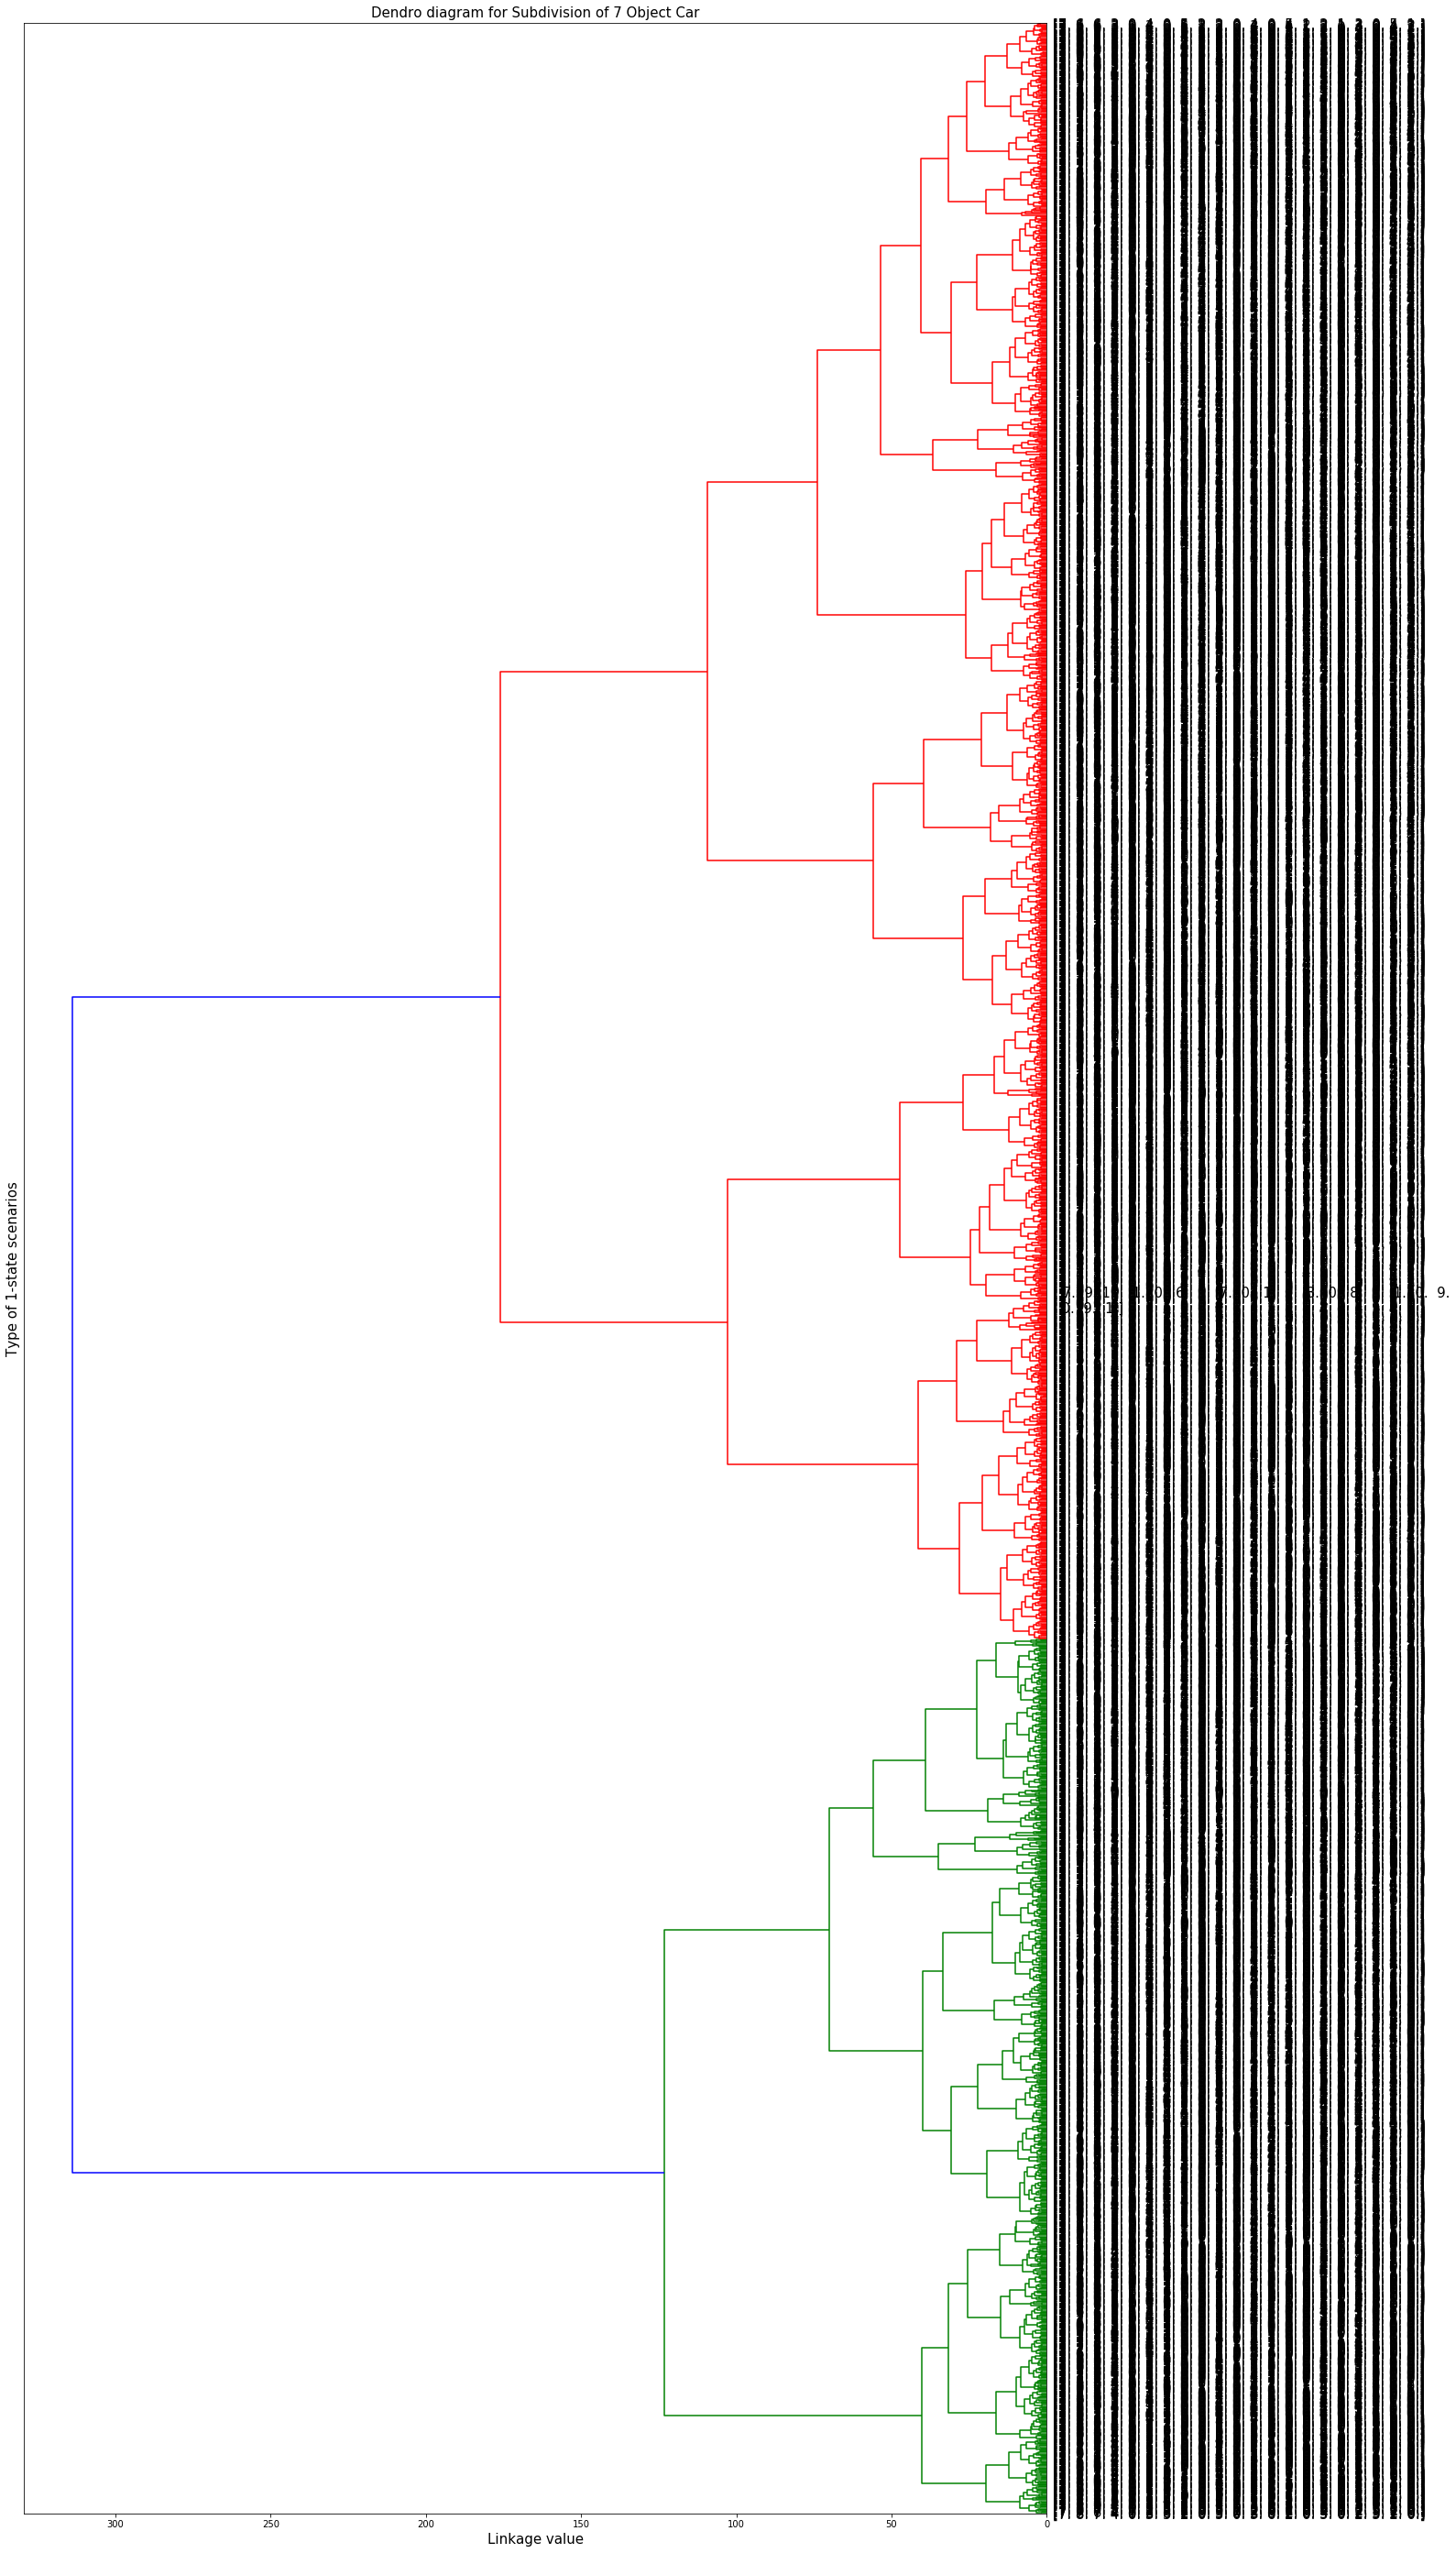

(2351, 4)


In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car7, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 7 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str7, leaf_rotation=0,orientation= 'left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [42]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[6.75000000e+02 6.76000000e+02 1.00000000e+00 2.00000000e+00]
 [5.22000000e+02 5.23000000e+02 1.00000000e+00 2.00000000e+00]
 [5.24000000e+02 2.35300000e+03 1.29099445e+00 3.00000000e+00]
 [1.72000000e+02 1.75000000e+02 1.41421356e+00 2.00000000e+00]
 [1.27000000e+02 1.74000000e+02 1.41421356e+00 2.00000000e+00]
 [1.78000000e+02 1.79000000e+02 1.41421356e+00 2.00000000e+00]
 [1.32000000e+02 1.33000000e+02 1.41421356e+00 2.00000000e+00]
 [1.34000000e+02 1.35000000e+02 1.41421356e+00 2.00000000e+00]
 [1.90000000e+02 1.91000000e+02 1.41421356e+00 2.00000000e+00]
 [6.26000000e+02 6.30000000e+02 1.41421356e+00 2.00000000e+00]
 [1.21000000e+02 1.22000000e+02 1.41421356e+00 2.00000000e+00]
 [3.29000000e+02 3.33000000e+02 1.41421356e+00 2.00000000e+00]
 [1.15000000e+02 1.67000000e+02 1.41421356e+00 2.00000000e+00]
 [2.62000000e+02 3.24000000e+02 1.41421356e+00 2.00000000e+00]
 [8.42000000e+02 8.43000000e+02 1.41421356e+00 2.00000000e+00]
 [5.43000000e+02 5.48000000e+02 1.41421356e+00 2.000000

523

In [43]:
car8 = matrix_1st[np.where(matrix_1st[:,0]==8),:]
car8 = car8[:,1:]
car8 = np.squeeze(car8,axis= (0,))
str8 = ";".join(str(i) for i in car8)
str8 = str8.split(";")
str8

['[8. 0. 0. 8. 0. 2. 6.]',
 '[8. 0. 0. 8. 0. 3. 5.]',
 '[8. 0. 0. 8. 0. 4. 4.]',
 '[8. 0. 0. 8. 0. 5. 3.]',
 '[8. 0. 0. 8. 0. 6. 2.]',
 '[8. 0. 0. 8. 0. 7. 1.]',
 '[8. 0. 0. 8. 0. 8. 0.]',
 '[8. 0. 0. 8. 2. 6. 0.]',
 '[8. 0. 0. 8. 7. 1. 0.]',
 '[8. 0. 1. 7. 0. 4. 4.]',
 '[8. 0. 1. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 1. 7.]',
 '[8. 1. 0. 7. 0. 2. 6.]',
 '[8. 1. 0. 7. 0. 3. 5.]',
 '[8. 1. 0. 7. 0. 4. 4.]',
 '[8. 1. 0. 7. 0. 5. 3.]',
 '[8. 1. 0. 7. 0. 6. 2.]',
 '[8. 1. 0. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 8. 0.]',
 '[8. 1. 0. 7. 2. 6. 0.]',
 '[8. 1. 0. 7. 3. 5. 0.]',
 '[8. 1. 1. 6. 0. 3. 5.]',
 '[8. 1. 1. 6. 0. 4. 4.]',
 '[8. 1. 1. 6. 0. 5. 3.]',
 '[8. 1. 1. 6. 0. 6. 2.]',
 '[8. 1. 1. 6. 0. 7. 1.]',
 '[8. 1. 1. 6. 2. 6. 0.]',
 '[8. 1. 1. 6. 3. 5. 0.]',
 '[8. 1. 1. 6. 4. 4. 0.]',
 '[8. 1. 1. 6. 5. 3. 0.]',
 '[8. 1. 1. 6. 6. 2. 0.]',
 '[8. 2. 0. 6. 0. 0. 8.]',
 '[8. 2. 0. 6. 0. 1. 7.]',
 '[8. 2. 0. 6. 0. 2. 6.]',
 '[8. 2. 0. 6. 0. 3. 5.]',
 '[8. 2. 0. 6. 0. 4. 4.]',
 '[8. 2. 0. 6. 0. 5. 3.]',
 

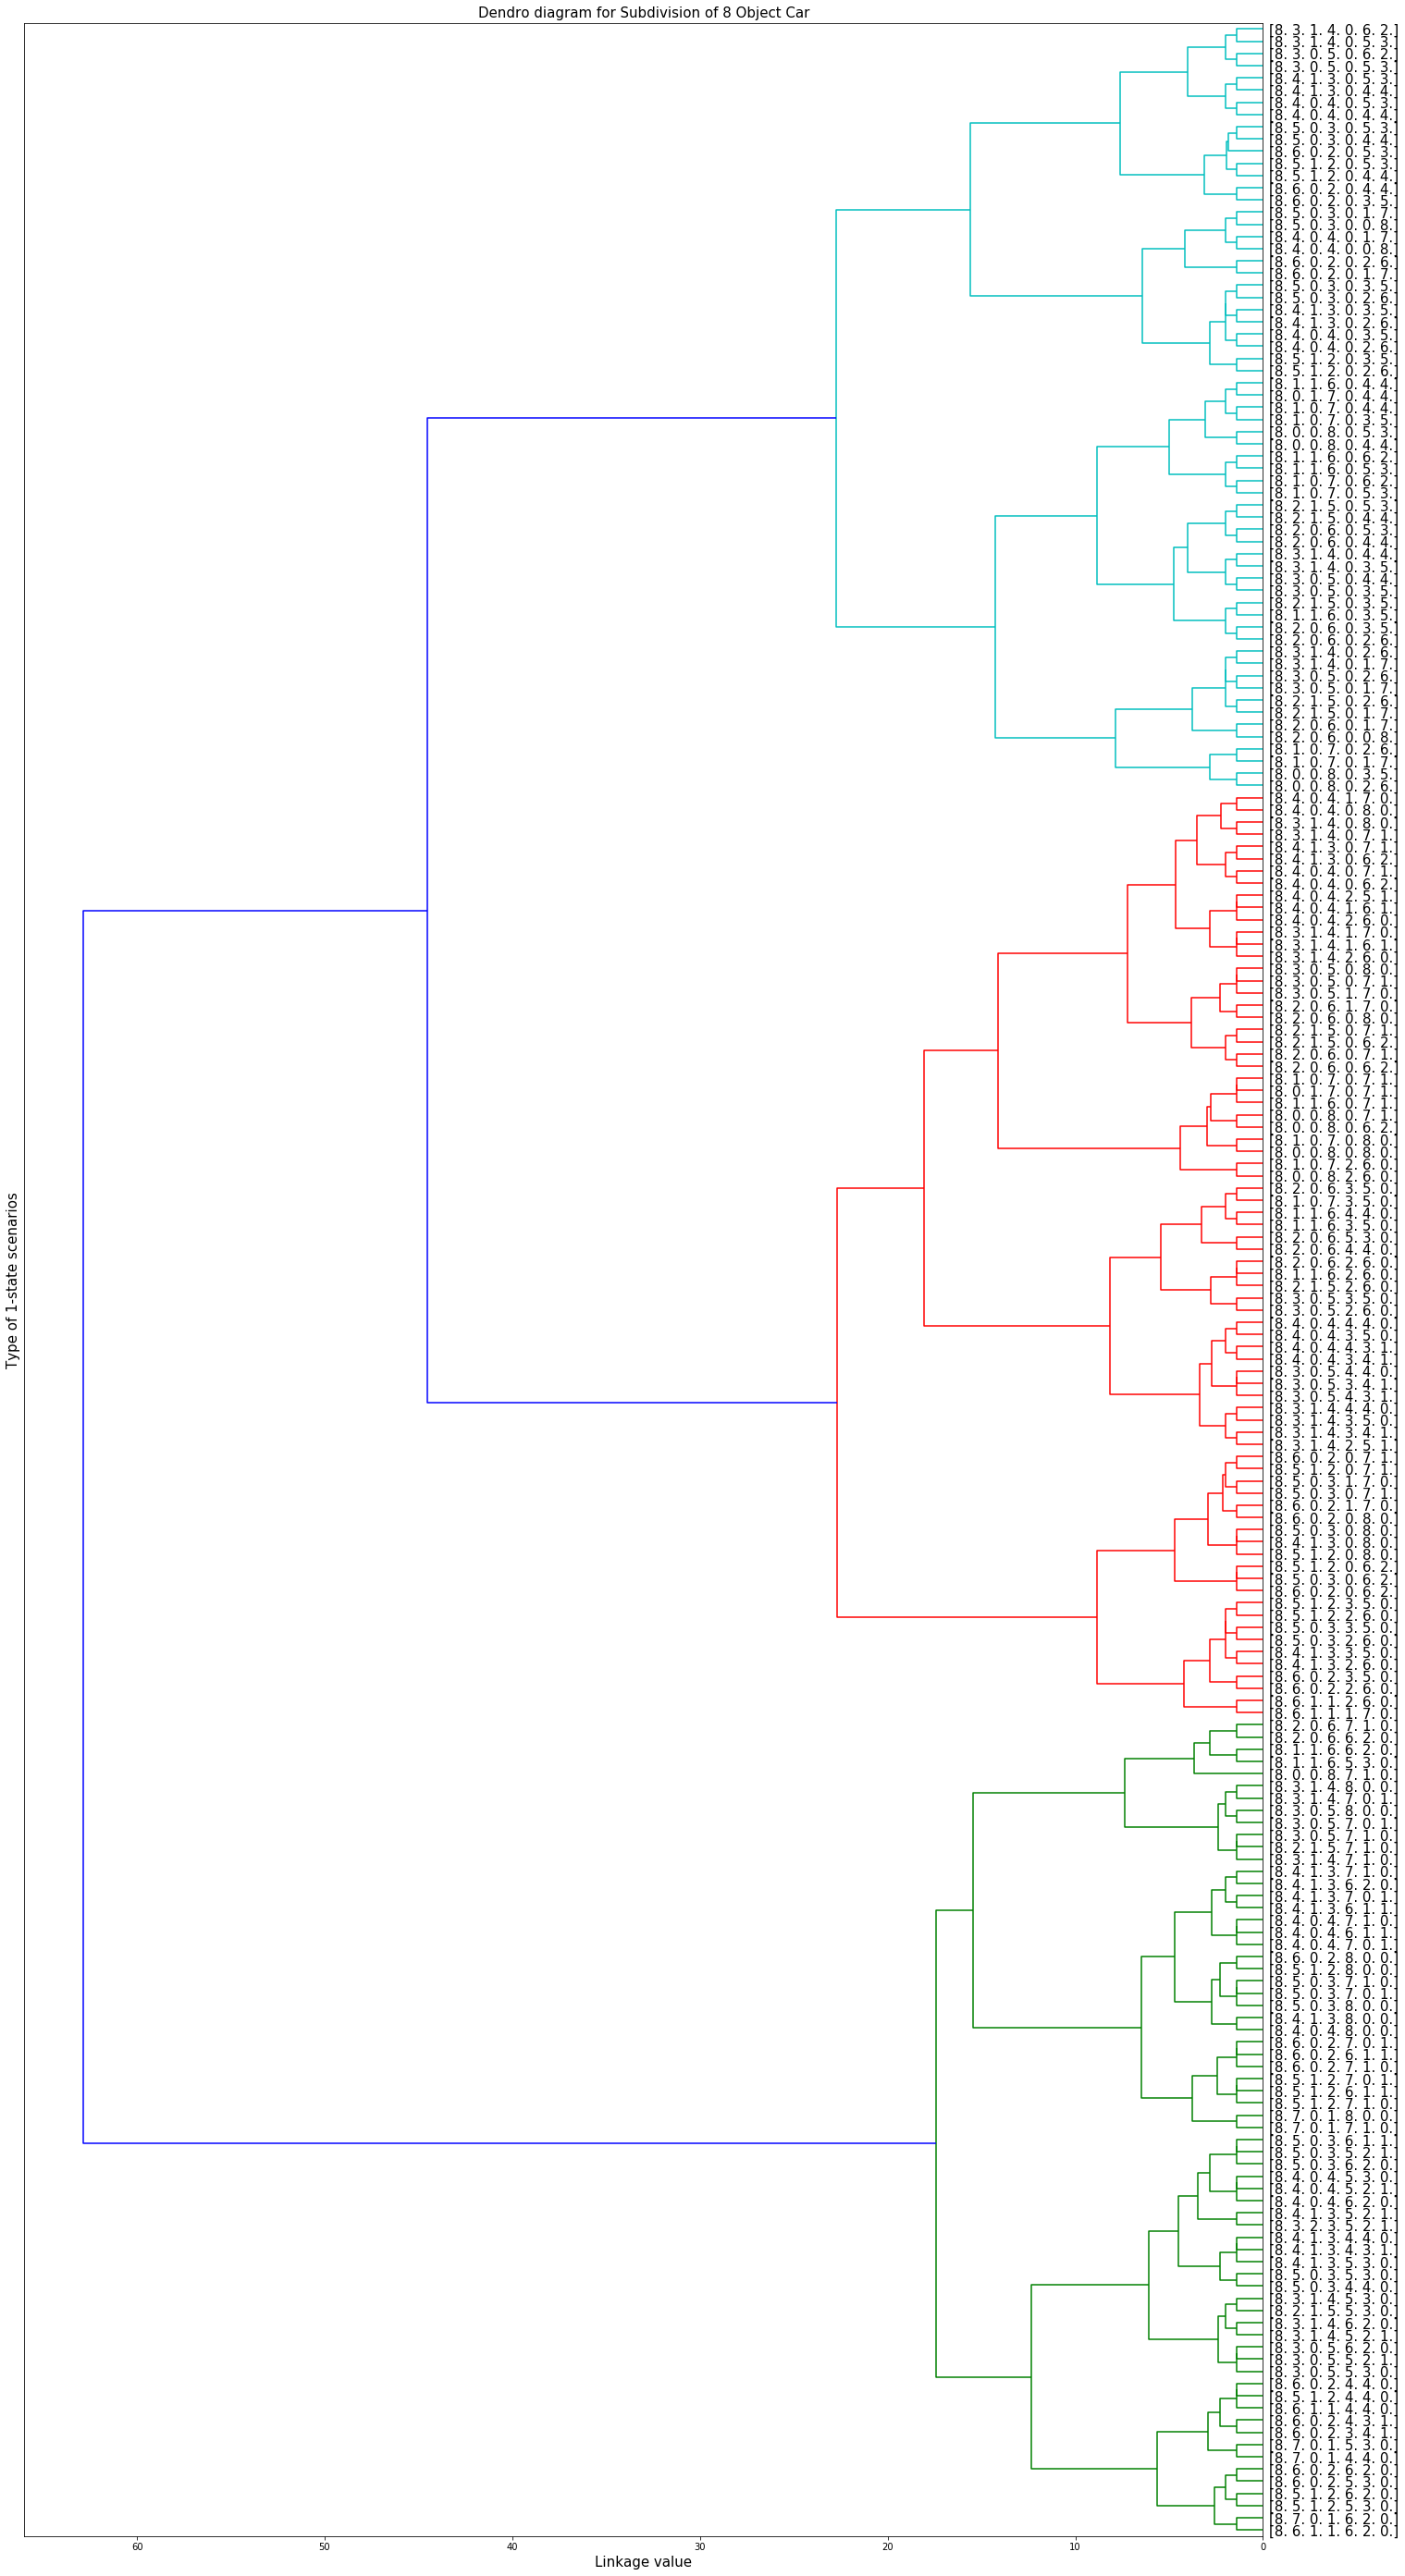

(205, 4)


In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car8, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(24, 50))
plt.title('Dendro diagram for Subdivision of 8 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str8, leaf_rotation=0,orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [45]:
car9 = matrix_1st[np.where(matrix_1st[:,0]==9),:]
car9 = car9[:,1:]
car9 = np.squeeze(car9,axis= (0,))
str9 = ";".join(str(i) for i in car9)
str9 = str9.split(";")
str9

['[9. 0. 0. 9. 0. 2. 7.]',
 '[9. 0. 0. 9. 0. 3. 6.]',
 '[9. 0. 0. 9. 0. 4. 5.]',
 '[9. 0. 0. 9. 0. 5. 4.]',
 '[9. 0. 0. 9. 0. 6. 3.]',
 '[9. 0. 0. 9. 0. 7. 2.]',
 '[9. 0. 0. 9. 0. 8. 1.]',
 '[9. 0. 0. 9. 0. 9. 0.]',
 '[9. 0. 0. 9. 8. 1. 0.]',
 '[9. 1. 0. 8. 0. 4. 5.]',
 '[9. 1. 0. 8. 0. 5. 4.]',
 '[9. 1. 0. 8. 0. 6. 3.]',
 '[9. 1. 0. 8. 0. 7. 2.]',
 '[9. 1. 0. 8. 0. 8. 1.]',
 '[9. 1. 0. 8. 0. 9. 0.]',
 '[9. 1. 0. 8. 2. 7. 0.]',
 '[9. 1. 1. 7. 0. 5. 4.]',
 '[9. 1. 1. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 2. 7.]',
 '[9. 2. 0. 7. 0. 3. 6.]',
 '[9. 2. 0. 7. 0. 4. 5.]',
 '[9. 2. 0. 7. 0. 5. 4.]',
 '[9. 2. 0. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 7. 2.]',
 '[9. 2. 0. 7. 0. 8. 1.]',
 '[9. 2. 0. 7. 0. 9. 0.]',
 '[9. 2. 0. 7. 2. 7. 0.]',
 '[9. 2. 0. 7. 4. 5. 0.]',
 '[9. 2. 0. 7. 5. 4. 0.]',
 '[9. 2. 1. 6. 0. 2. 7.]',
 '[9. 2. 1. 6. 0. 4. 5.]',
 '[9. 2. 1. 6. 0. 5. 4.]',
 '[9. 2. 1. 6. 0. 6. 3.]',
 '[9. 2. 1. 6. 0. 7. 2.]',
 '[9. 2. 1. 6. 0. 8. 1.]',
 '[9. 2. 1. 6. 0. 9. 0.]',
 '[9. 2. 1. 6. 5. 4. 0.]',
 

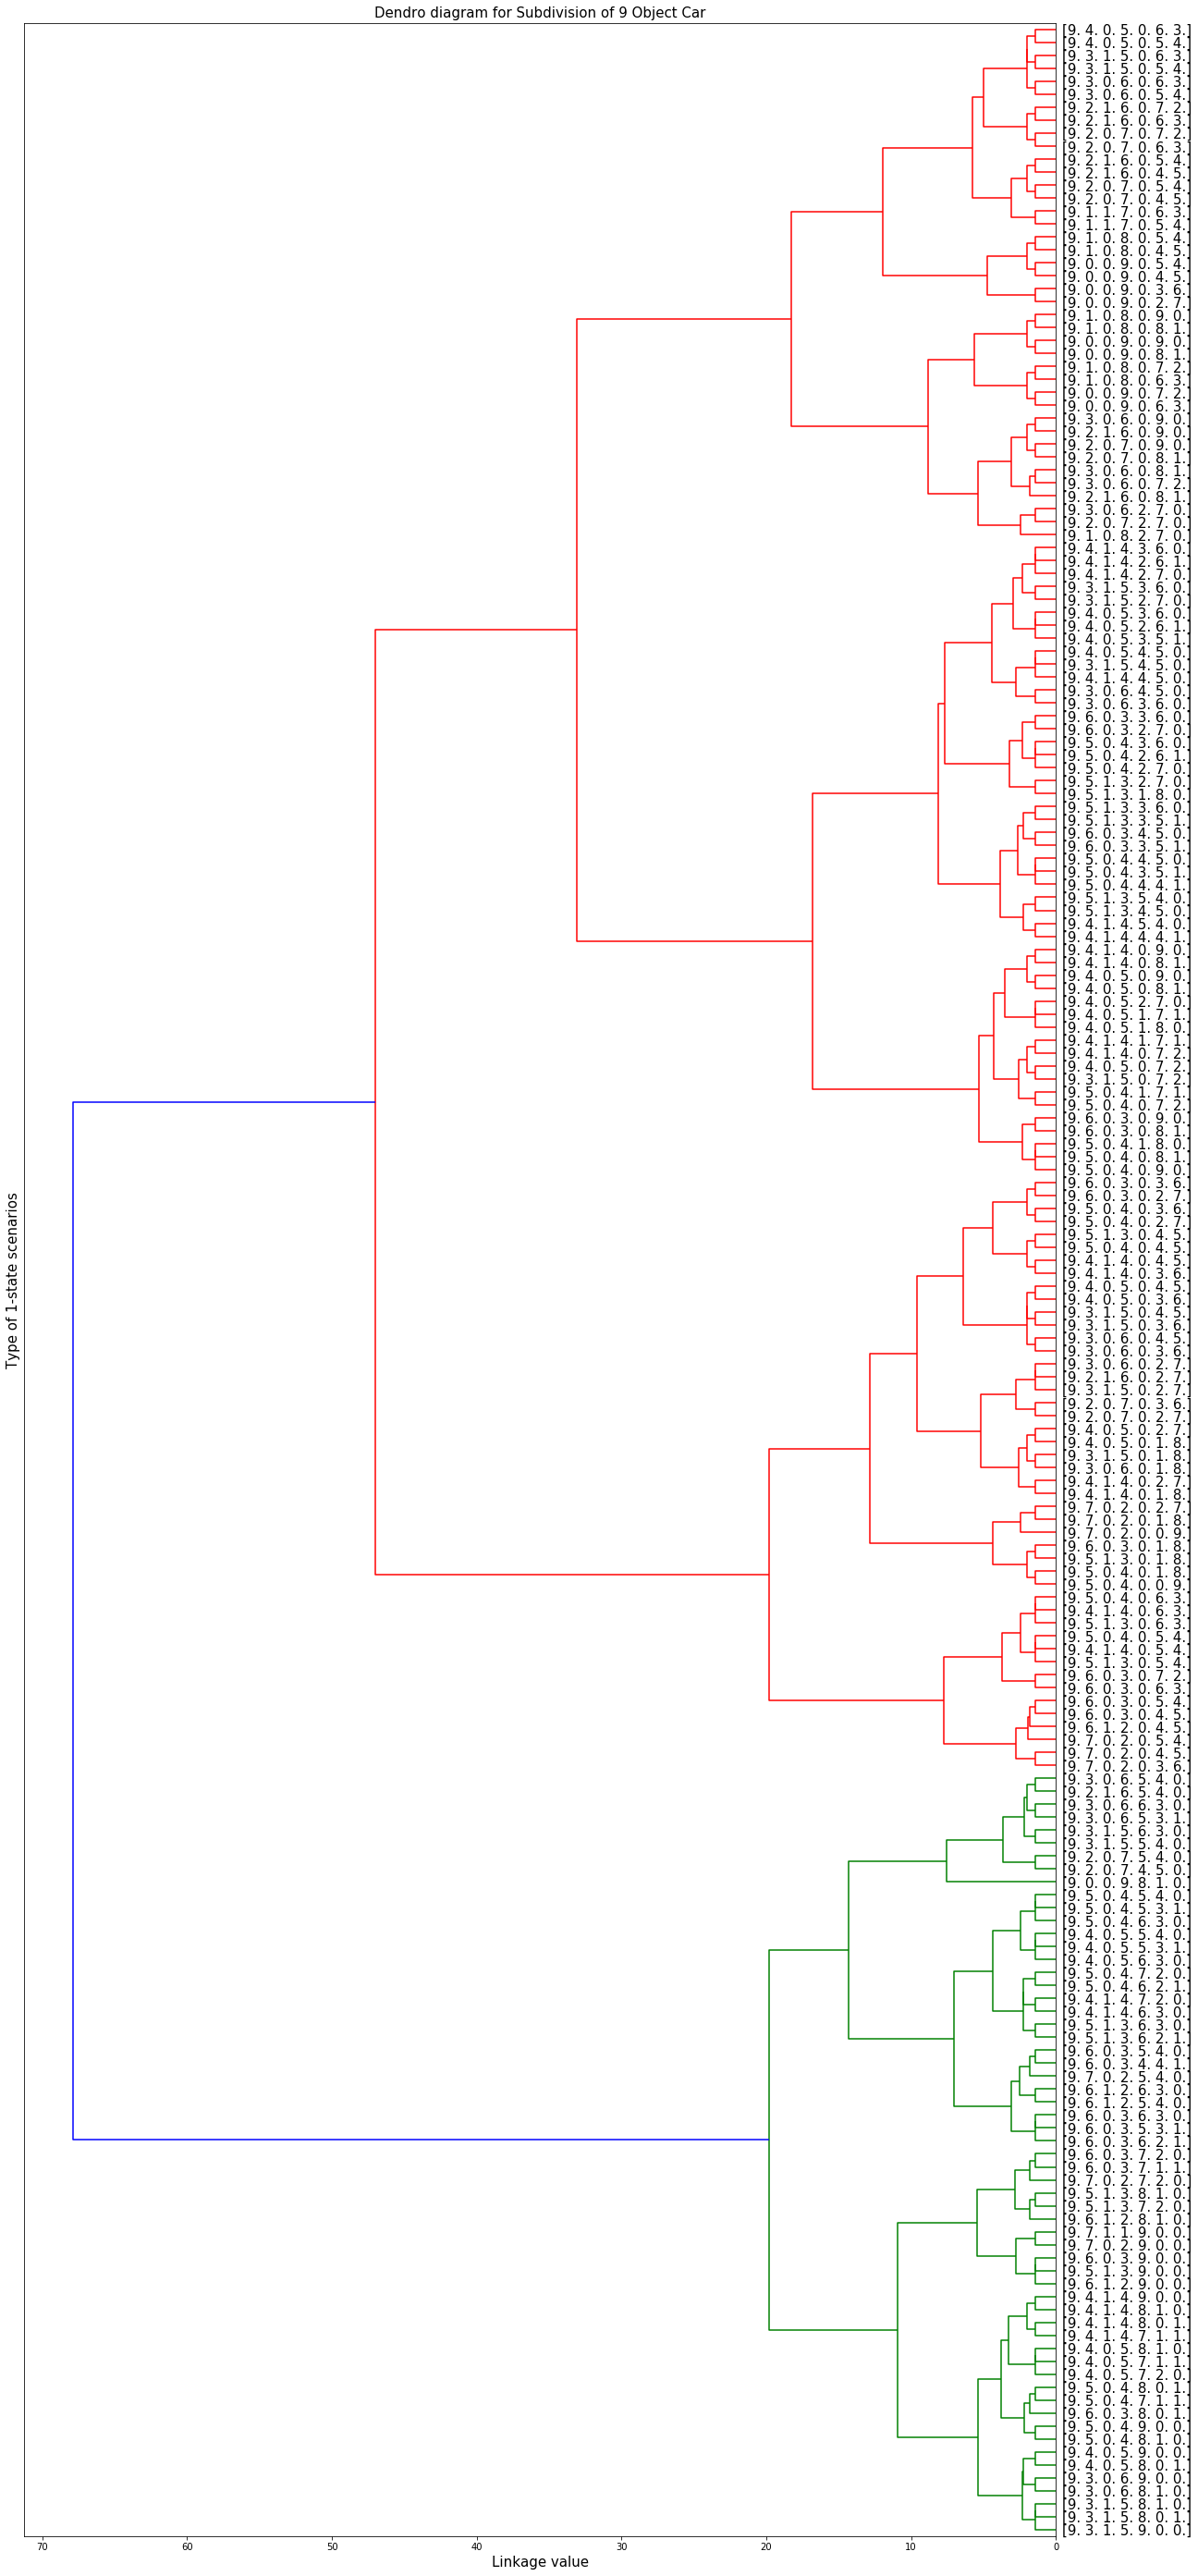

(193, 4)


In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car9, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 9 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str9, orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)